# Урок 8

ЗАДАНИЕ 1.

Скачать любой понравившийся вам датасет с UCI repository(можете даже свой какой-то взять) и сразу же разделите его на тренировочную и тестовую выборки. Тестовую выборку сохраните на диск и больше не трогайте. 

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
ds_name="car.data"
data = pd.read_csv(ds_name, header=None)

In [3]:
print(data.shape)
data.head(10)

(1728, 7)


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
data.iloc[:, -1].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: 6, dtype: int64

In [5]:
data.columns=['buying','maint','doors','persons','lug_boot','safety', 'car_class' ]

In [6]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,car_class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,3,2,small,high,unacc
freq,432,432,432,576,576,576,1210


**Preprocess and feature engineering**

In [7]:
#используем бинарную классификацию - 0 - unacc, 1  - acc и лучше
data['car_class'] = data['car_class'].replace({'unacc': 0, 'acc': 1, 'good':1,'vgood':1})

#Separating unacc car_class and other car_class customers
unacc_car_class     = data[data["car_class"] == 0]
acc_car_class = data[data["car_class"] == 1]

target_col = ['car_class']
cat_cols   = ['buying','maint','doors','persons','lug_boot','safety']

In [8]:
data.iloc[:, -1].value_counts()

0    1210
1     518
Name: car_class, dtype: int64

In [9]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

print(data.iloc[:, -1].isnull().sum())

Rows     :  1728
Columns  :  7

Features : 
 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car_class']

Missing values :   0

Unique values :  
 buying       4
maint        4
doors        4
persons      3
lug_boot     3
safety       3
car_class    2
dtype: int64
0


**Creating a holdout dataset (test)**

In [10]:
from sklearn.model_selection import train_test_split

features = cat_cols
target = 'car_class'

X_train, X_test, y_train, y_test = train_test_split(data[features], 
                                                    data[target], test_size=0.33, random_state=42)
#save test
X_test.to_csv("X_test.csv", index=None)
y_test.to_csv("y_test.csv", index=None)
#save train
X_train.to_csv("X_train.csv", index=None)
y_train.to_csv("y_train.csv", index=None)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [11]:
y_train.head()

48      0
468     0
155     0
1721    1
1208    0
Name: car_class, dtype: int64

ЗАДАНИЕ 2.

Провести EDA (exploratory data analysis: histograms, boxplots - visualization, etc).

In [12]:
#labels
lab = data['car_class'].value_counts().keys().tolist()
#values
val = data['car_class'].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "car_class >= acc : 1,car_class == unacc: 0 in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

fig_data = [trace]
fig = go.Figure(data = fig_data,layout = layout)
py.iplot(fig)

In [13]:
def get_title(column):
    if(column=='buying'):
        return 'car buying price'
    elif(column=='maint'):
        return 'price of the maintenance'
    elif (column=='doors'):
        return 'number of doors'
    elif (column=='persons'):
        return 'capacity in terms of persons to carry'
    elif (column=='lug_boot'):
        return 'the size of luggage boot'
    elif (column=='safety'):
        return 'estimated safety of the car'
    
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = acc_car_class[column].value_counts().values.tolist(),
                    labels  = acc_car_class[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "car_class >= acc",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = unacc_car_class[column].value_counts().values.tolist(),
                    labels  = unacc_car_class[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "car_class == unacc" 
                   )


    
    layout = go.Layout(dict(title = get_title(column) + " distribution ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "car_class >= acc",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "car_class == unacc",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data_fig = [trace1,trace2]
    fig  = go.Figure(data = data_fig,layout = layout)
    py.iplot(fig)


#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)



In [14]:

group_cols=cat_cols
groups_class_ge_accs  = [acc_car_class["buying"].value_counts().reset_index(),
                   acc_car_class["maint"].value_counts().reset_index(),
                   acc_car_class["doors"].value_counts().reset_index(),
                   acc_car_class["persons"].value_counts().reset_index(),
                   acc_car_class["lug_boot"].value_counts().reset_index(),
                   acc_car_class["safety"].value_counts().reset_index()]
groups_class_eq_unaccs =  [unacc_car_class["buying"].value_counts().reset_index(),
                   unacc_car_class["maint"].value_counts().reset_index(),
                   unacc_car_class["doors"].value_counts().reset_index(),
                   unacc_car_class["persons"].value_counts().reset_index(),
                   unacc_car_class["lug_boot"].value_counts().reset_index(),
                   unacc_car_class["safety"].value_counts().reset_index()]
group_count=len(group_cols)

for i in range(group_count):
    groups_class_ge_acc=groups_class_ge_accs[i]
    groups_class_eq_unacc=groups_class_eq_unaccs[i]
    groups_class_ge_acc.columns  = [group_cols[i],"count"]
    groups_class_eq_unacc.columns = [group_cols[i],"count"]

    #bar - car_class_ge_acc
    trace1 = go.Bar(x = groups_class_ge_acc[group_cols[i]]  , y = groups_class_ge_acc["count"],
                name = "car_class >= acc",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

    #bar - not car_class_ge_acc
    trace2 = go.Bar(x = groups_class_eq_unacc[group_cols[i]] , y = groups_class_eq_unacc["count"],
                name = "car_class == unacc",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

    layout = go.Layout(dict(title = "Distribution in "+get_title(group_cols[i]),
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = group_cols[i],
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
    data_fig = [trace1,trace2]
    fig  = go.Figure(data=data_fig,layout=layout)
    py.iplot(fig)

ЗАДАНИЕ 3.

Сделать feature engineering. При этом постарайтесь «завернуть» ваш код для преобразования данных в классы или функции (пример Transformer как в ноутбуке).

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
  
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

In [16]:
from sklearn.pipeline import Pipeline

#'buying','maint','doors','persons','lug_boot','safety'
buying = Pipeline([
                ('selector', ColumnSelector(key='buying')),
                ('ohe', OHEEncoder(key='buying'))
            ])
maint = Pipeline([
                ('selector', ColumnSelector(key='maint')),
                ('ohe', OHEEncoder(key='maint'))
            ])
doors = Pipeline([
                ('selector', ColumnSelector(key='doors')),
                ('ohe', OHEEncoder(key='doors'))
            ])
persons = Pipeline([
                ('selector', ColumnSelector(key='persons')),
                ('ohe', OHEEncoder(key='persons'))
            ])
lug_boot = Pipeline([
                ('selector', ColumnSelector(key='lug_boot')),
                ('ohe', OHEEncoder(key='lug_boot'))
            ])
safety = Pipeline([
                ('selector', ColumnSelector(key='safety')),
                ('ohe', OHEEncoder(key='safety'))
            ])

In [17]:
from sklearn.pipeline import FeatureUnion

#'buying','maint','doors','persons','lug_boot','safety'
feats = FeatureUnion([('buying', buying), 
                      ('maint', maint),
                      ('doors', doors),
                      ('persons', persons),
                      ('lug_boot', lug_boot),
                      ('safety', safety)
                      ])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(X_train)

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]], dtype=uint8)

ЗАДАНИЕ 4. 

Обучить базовую модель (любую - на ваш выбор). При этом нужно использовать cross validation

In [18]:
from catboost import CatBoostClassifier

iterations=20
learning_rate=0.01
depth=5

pipeline = Pipeline([
    ('features',feats),
    ('classifier', 
     CatBoostClassifier(iterations=iterations,learning_rate=learning_rate,depth=depth, 
                        thread_count=2, random_state=42, silent=True)),
])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)
np.mean(preds == y_test)

0.9474605954465849

In [19]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'features', 'classifier', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__buying', 'features__maint', 'features__doors', 'features__persons', 'features__lug_boot', 'features__safety', 'features__buying__memory', 'features__buying__steps', 'features__buying__verbose', 'features__buying__selector', 'features__buying__ohe', 'features__buying__selector__key', 'features__buying__ohe__key', 'features__maint__memory', 'features__maint__steps', 'features__maint__verbose', 'features__maint__selector', 'features__maint__ohe', 'features__maint__selector__key', 'features__maint__ohe__key', 'features__doors__memory', 'features__doors__steps', 'features__doors__verbose', 'features__doors__selector', 'features__doors__ohe', 'features__doors__selector__key', 'features__doors__ohe__key', 'features__persons__memory', 'features__persons__steps', 'features__persons__verbose', 'features__persons__sel

Делаем кросс-валидацию на GridSearchCV используя имена параметров классификатора, полученные на пред. шаге

In [20]:
from sklearn.model_selection import GridSearchCV

hyperparameters = { 'classifier__iterations': [10, 20, 30],
                    'classifier__learning_rate': [0.005,0.01,0.05],
                    'classifier__depth' : [3,5,7],
                    'classifier__random_state':[42]
                  }
clf = GridSearchCV(pipeline, hyperparameters, cv=5)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('buying',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnSelector(key='buying')),
                                                                                        ('ohe',
                                                                                         OHEEncoder(key='buying'))])),
                                                                       ('maint',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnSelector(key='maint')),
                                                                                        ('ohe',
              

In [21]:
clf.best_params_

{'classifier__depth': 7,
 'classifier__iterations': 30,
 'classifier__learning_rate': 0.05,
 'classifier__random_state': 42}

In [22]:
#refitting on entire training data using best settings
clf.refit

preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)

np.mean(preds == y_test)

0.9859894921190894

Теперь сравним множество разных моделей

In [23]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    SVC(),
    SGDClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    xgb.XGBClassifier(),
    CatBoostClassifier(),
    RandomForestClassifier()
]

In [24]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

In [25]:
from sklearn.model_selection import cross_validate
from pprint import pprint

for clf in classifiers:
    pipeline.set_params(classifier=clf)
    scores = cross_validate(pipeline, X_train, y_train, scoring='roc_auc', cv=3)
    #print(scores)
    print('----------------------')
    print(str(clf))
    print('----------------------')
    pprint('Leaderboard score - mean auc test '+str((scores['test_score'].mean())))

----------------------
SVC()
----------------------
'Leaderboard score - mean auc test 0.9987642645305171'
----------------------
SGDClassifier()
----------------------
'Leaderboard score - mean auc test 0.987110672022052'
----------------------
KNeighborsClassifier()
----------------------
'Leaderboard score - mean auc test 0.9762222484925078'
----------------------
DecisionTreeClassifier()
----------------------
'Leaderboard score - mean auc test 0.9753970331465328'
----------------------
ExtraTreeClassifier()
----------------------
'Leaderboard score - mean auc test 0.916240009082013'
----------------------
GradientBoostingClassifier()
----------------------
'Leaderboard score - mean auc test 0.999098741559498'
----------------------
AdaBoostClassifier()
----------------------
'Leaderboard score - mean auc test 0.9895454583836457'
----------------------
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, ga

169:	learn: 0.1503212	total: 299ms	remaining: 1.46s
170:	learn: 0.1492987	total: 301ms	remaining: 1.46s
171:	learn: 0.1485488	total: 303ms	remaining: 1.46s
172:	learn: 0.1477428	total: 306ms	remaining: 1.46s
173:	learn: 0.1469152	total: 308ms	remaining: 1.46s
174:	learn: 0.1463811	total: 310ms	remaining: 1.46s
175:	learn: 0.1457990	total: 311ms	remaining: 1.46s
176:	learn: 0.1451212	total: 313ms	remaining: 1.46s
177:	learn: 0.1445476	total: 315ms	remaining: 1.45s
178:	learn: 0.1440503	total: 316ms	remaining: 1.45s
179:	learn: 0.1434217	total: 318ms	remaining: 1.45s
180:	learn: 0.1429617	total: 320ms	remaining: 1.45s
181:	learn: 0.1423096	total: 321ms	remaining: 1.44s
182:	learn: 0.1419361	total: 323ms	remaining: 1.44s
183:	learn: 0.1415623	total: 325ms	remaining: 1.44s
184:	learn: 0.1412289	total: 326ms	remaining: 1.44s
185:	learn: 0.1404319	total: 328ms	remaining: 1.44s
186:	learn: 0.1399271	total: 330ms	remaining: 1.43s
187:	learn: 0.1391290	total: 331ms	remaining: 1.43s
188:	learn: 

373:	learn: 0.0765254	total: 639ms	remaining: 1.07s
374:	learn: 0.0763349	total: 641ms	remaining: 1.07s
375:	learn: 0.0760980	total: 642ms	remaining: 1.06s
376:	learn: 0.0758418	total: 644ms	remaining: 1.06s
377:	learn: 0.0755773	total: 646ms	remaining: 1.06s
378:	learn: 0.0754026	total: 647ms	remaining: 1.06s
379:	learn: 0.0752515	total: 649ms	remaining: 1.06s
380:	learn: 0.0751134	total: 651ms	remaining: 1.06s
381:	learn: 0.0748769	total: 653ms	remaining: 1.05s
382:	learn: 0.0746437	total: 654ms	remaining: 1.05s
383:	learn: 0.0744283	total: 656ms	remaining: 1.05s
384:	learn: 0.0741415	total: 657ms	remaining: 1.05s
385:	learn: 0.0738992	total: 659ms	remaining: 1.05s
386:	learn: 0.0736634	total: 661ms	remaining: 1.05s
387:	learn: 0.0734912	total: 662ms	remaining: 1.04s
388:	learn: 0.0732936	total: 664ms	remaining: 1.04s
389:	learn: 0.0731821	total: 666ms	remaining: 1.04s
390:	learn: 0.0729617	total: 668ms	remaining: 1.04s
391:	learn: 0.0728609	total: 670ms	remaining: 1.04s
392:	learn: 

586:	learn: 0.0467718	total: 977ms	remaining: 688ms
587:	learn: 0.0466555	total: 979ms	remaining: 686ms
588:	learn: 0.0465460	total: 981ms	remaining: 684ms
589:	learn: 0.0464803	total: 983ms	remaining: 683ms
590:	learn: 0.0463800	total: 984ms	remaining: 681ms
591:	learn: 0.0462889	total: 986ms	remaining: 680ms
592:	learn: 0.0461870	total: 988ms	remaining: 678ms
593:	learn: 0.0460779	total: 989ms	remaining: 676ms
594:	learn: 0.0459874	total: 991ms	remaining: 674ms
595:	learn: 0.0458853	total: 992ms	remaining: 673ms
596:	learn: 0.0458101	total: 994ms	remaining: 671ms
597:	learn: 0.0457252	total: 996ms	remaining: 669ms
598:	learn: 0.0456141	total: 997ms	remaining: 667ms
599:	learn: 0.0455178	total: 999ms	remaining: 666ms
600:	learn: 0.0453973	total: 1s	remaining: 664ms
601:	learn: 0.0452969	total: 1s	remaining: 662ms
602:	learn: 0.0451946	total: 1s	remaining: 661ms
603:	learn: 0.0451204	total: 1s	remaining: 659ms
604:	learn: 0.0450589	total: 1.01s	remaining: 657ms
605:	learn: 0.0449790	to

798:	learn: 0.0303970	total: 1.31s	remaining: 331ms
799:	learn: 0.0303509	total: 1.32s	remaining: 329ms
800:	learn: 0.0302862	total: 1.32s	remaining: 328ms
801:	learn: 0.0302282	total: 1.32s	remaining: 326ms
802:	learn: 0.0301673	total: 1.32s	remaining: 324ms
803:	learn: 0.0301159	total: 1.32s	remaining: 323ms
804:	learn: 0.0300601	total: 1.32s	remaining: 321ms
805:	learn: 0.0300111	total: 1.33s	remaining: 319ms
806:	learn: 0.0299607	total: 1.33s	remaining: 318ms
807:	learn: 0.0298897	total: 1.33s	remaining: 316ms
808:	learn: 0.0298440	total: 1.33s	remaining: 314ms
809:	learn: 0.0297870	total: 1.33s	remaining: 313ms
810:	learn: 0.0297323	total: 1.33s	remaining: 311ms
811:	learn: 0.0296766	total: 1.34s	remaining: 309ms
812:	learn: 0.0296241	total: 1.34s	remaining: 308ms
813:	learn: 0.0295619	total: 1.34s	remaining: 306ms
814:	learn: 0.0295135	total: 1.34s	remaining: 304ms
815:	learn: 0.0294667	total: 1.34s	remaining: 303ms
816:	learn: 0.0293904	total: 1.34s	remaining: 301ms
817:	learn: 

997:	learn: 0.0211869	total: 1.66s	remaining: 3.32ms
998:	learn: 0.0211447	total: 1.66s	remaining: 1.66ms
999:	learn: 0.0211138	total: 1.66s	remaining: 0us
Learning rate set to 0.009219
0:	learn: 0.6798945	total: 1.11ms	remaining: 1.11s
1:	learn: 0.6687143	total: 4.78ms	remaining: 2.38s
2:	learn: 0.6563344	total: 6ms	remaining: 2s
3:	learn: 0.6439389	total: 7.52ms	remaining: 1.87s
4:	learn: 0.6327230	total: 9.04ms	remaining: 1.8s
5:	learn: 0.6209666	total: 10.5ms	remaining: 1.75s
6:	learn: 0.6106362	total: 12.2ms	remaining: 1.74s
7:	learn: 0.5994156	total: 13.8ms	remaining: 1.71s
8:	learn: 0.5895603	total: 15.3ms	remaining: 1.68s
9:	learn: 0.5793601	total: 16.8ms	remaining: 1.67s
10:	learn: 0.5690232	total: 18.4ms	remaining: 1.66s
11:	learn: 0.5592903	total: 19.9ms	remaining: 1.64s
12:	learn: 0.5511969	total: 21.5ms	remaining: 1.63s
13:	learn: 0.5428567	total: 23.1ms	remaining: 1.62s
14:	learn: 0.5329933	total: 23.9ms	remaining: 1.57s
15:	learn: 0.5242748	total: 25.3ms	remaining: 1.56s

159:	learn: 0.1552750	total: 273ms	remaining: 1.43s
160:	learn: 0.1544572	total: 275ms	remaining: 1.43s
161:	learn: 0.1537656	total: 277ms	remaining: 1.43s
162:	learn: 0.1531492	total: 279ms	remaining: 1.43s
163:	learn: 0.1526055	total: 281ms	remaining: 1.43s
164:	learn: 0.1519916	total: 283ms	remaining: 1.43s
165:	learn: 0.1511677	total: 284ms	remaining: 1.43s
166:	learn: 0.1504822	total: 286ms	remaining: 1.43s
167:	learn: 0.1497203	total: 288ms	remaining: 1.43s
168:	learn: 0.1487337	total: 290ms	remaining: 1.42s
169:	learn: 0.1484383	total: 292ms	remaining: 1.42s
170:	learn: 0.1480889	total: 293ms	remaining: 1.42s
171:	learn: 0.1473541	total: 295ms	remaining: 1.42s
172:	learn: 0.1466311	total: 297ms	remaining: 1.42s
173:	learn: 0.1459968	total: 299ms	remaining: 1.42s
174:	learn: 0.1451328	total: 301ms	remaining: 1.42s
175:	learn: 0.1445827	total: 305ms	remaining: 1.43s
176:	learn: 0.1439070	total: 307ms	remaining: 1.43s
177:	learn: 0.1431306	total: 309ms	remaining: 1.43s
178:	learn: 

364:	learn: 0.0733897	total: 618ms	remaining: 1.07s
365:	learn: 0.0731153	total: 620ms	remaining: 1.07s
366:	learn: 0.0731076	total: 621ms	remaining: 1.07s
367:	learn: 0.0727480	total: 622ms	remaining: 1.07s
368:	learn: 0.0724802	total: 624ms	remaining: 1.07s
369:	learn: 0.0723018	total: 626ms	remaining: 1.06s
370:	learn: 0.0721615	total: 627ms	remaining: 1.06s
371:	learn: 0.0718949	total: 629ms	remaining: 1.06s
372:	learn: 0.0717125	total: 630ms	remaining: 1.06s
373:	learn: 0.0713710	total: 632ms	remaining: 1.06s
374:	learn: 0.0711097	total: 633ms	remaining: 1.05s
375:	learn: 0.0709130	total: 635ms	remaining: 1.05s
376:	learn: 0.0706464	total: 636ms	remaining: 1.05s
377:	learn: 0.0704323	total: 638ms	remaining: 1.05s
378:	learn: 0.0702163	total: 639ms	remaining: 1.05s
379:	learn: 0.0700283	total: 641ms	remaining: 1.04s
380:	learn: 0.0697957	total: 642ms	remaining: 1.04s
381:	learn: 0.0695822	total: 644ms	remaining: 1.04s
382:	learn: 0.0695695	total: 645ms	remaining: 1.04s
383:	learn: 

578:	learn: 0.0424707	total: 955ms	remaining: 695ms
579:	learn: 0.0423672	total: 957ms	remaining: 693ms
580:	learn: 0.0422357	total: 958ms	remaining: 691ms
581:	learn: 0.0421253	total: 960ms	remaining: 689ms
582:	learn: 0.0420722	total: 961ms	remaining: 688ms
583:	learn: 0.0419585	total: 963ms	remaining: 686ms
584:	learn: 0.0418474	total: 964ms	remaining: 684ms
585:	learn: 0.0417753	total: 966ms	remaining: 682ms
586:	learn: 0.0416811	total: 967ms	remaining: 681ms
587:	learn: 0.0416406	total: 969ms	remaining: 679ms
588:	learn: 0.0415460	total: 971ms	remaining: 677ms
589:	learn: 0.0414634	total: 972ms	remaining: 676ms
590:	learn: 0.0413640	total: 974ms	remaining: 674ms
591:	learn: 0.0412400	total: 975ms	remaining: 672ms
592:	learn: 0.0411574	total: 977ms	remaining: 670ms
593:	learn: 0.0410779	total: 978ms	remaining: 669ms
594:	learn: 0.0410078	total: 980ms	remaining: 667ms
595:	learn: 0.0408932	total: 981ms	remaining: 665ms
596:	learn: 0.0407731	total: 983ms	remaining: 663ms
597:	learn: 

790:	learn: 0.0269535	total: 1.29s	remaining: 342ms
791:	learn: 0.0269073	total: 1.3s	remaining: 340ms
792:	learn: 0.0268341	total: 1.3s	remaining: 339ms
793:	learn: 0.0267878	total: 1.3s	remaining: 337ms
794:	learn: 0.0267301	total: 1.3s	remaining: 336ms
795:	learn: 0.0266785	total: 1.3s	remaining: 334ms
796:	learn: 0.0266312	total: 1.3s	remaining: 332ms
797:	learn: 0.0265718	total: 1.31s	remaining: 331ms
798:	learn: 0.0265223	total: 1.31s	remaining: 329ms
799:	learn: 0.0264632	total: 1.31s	remaining: 327ms
800:	learn: 0.0264171	total: 1.31s	remaining: 326ms
801:	learn: 0.0263485	total: 1.31s	remaining: 324ms
802:	learn: 0.0263020	total: 1.31s	remaining: 323ms
803:	learn: 0.0262526	total: 1.32s	remaining: 321ms
804:	learn: 0.0261979	total: 1.32s	remaining: 319ms
805:	learn: 0.0261473	total: 1.32s	remaining: 318ms
806:	learn: 0.0260916	total: 1.32s	remaining: 316ms
807:	learn: 0.0260424	total: 1.32s	remaining: 314ms
808:	learn: 0.0259724	total: 1.32s	remaining: 313ms
809:	learn: 0.0259

Learning rate set to 0.009225
0:	learn: 0.6811110	total: 1.69ms	remaining: 1.68s
1:	learn: 0.6679470	total: 3.35ms	remaining: 1.67s
2:	learn: 0.6553458	total: 4.95ms	remaining: 1.64s
3:	learn: 0.6449960	total: 6.63ms	remaining: 1.65s
4:	learn: 0.6338412	total: 8.39ms	remaining: 1.67s
5:	learn: 0.6227630	total: 10.3ms	remaining: 1.71s
6:	learn: 0.6115953	total: 13ms	remaining: 1.85s
7:	learn: 0.6010460	total: 14.7ms	remaining: 1.82s
8:	learn: 0.5887855	total: 15.9ms	remaining: 1.75s
9:	learn: 0.5783175	total: 17.5ms	remaining: 1.73s
10:	learn: 0.5682352	total: 19.1ms	remaining: 1.72s
11:	learn: 0.5579702	total: 20.7ms	remaining: 1.7s
12:	learn: 0.5492022	total: 22.3ms	remaining: 1.69s
13:	learn: 0.5400256	total: 23.9ms	remaining: 1.68s
14:	learn: 0.5293542	total: 24.9ms	remaining: 1.63s
15:	learn: 0.5201971	total: 26.4ms	remaining: 1.63s
16:	learn: 0.5120576	total: 28ms	remaining: 1.62s
17:	learn: 0.5033612	total: 29.8ms	remaining: 1.63s
18:	learn: 0.4961082	total: 31.4ms	remaining: 1.6

207:	learn: 0.1212507	total: 336ms	remaining: 1.28s
208:	learn: 0.1208530	total: 338ms	remaining: 1.28s
209:	learn: 0.1204703	total: 339ms	remaining: 1.27s
210:	learn: 0.1200587	total: 341ms	remaining: 1.27s
211:	learn: 0.1195236	total: 342ms	remaining: 1.27s
212:	learn: 0.1191059	total: 344ms	remaining: 1.27s
213:	learn: 0.1185504	total: 346ms	remaining: 1.27s
214:	learn: 0.1179917	total: 348ms	remaining: 1.27s
215:	learn: 0.1175562	total: 350ms	remaining: 1.27s
216:	learn: 0.1170077	total: 351ms	remaining: 1.27s
217:	learn: 0.1166117	total: 353ms	remaining: 1.26s
218:	learn: 0.1162003	total: 354ms	remaining: 1.26s
219:	learn: 0.1155909	total: 356ms	remaining: 1.26s
220:	learn: 0.1150804	total: 357ms	remaining: 1.26s
221:	learn: 0.1147481	total: 359ms	remaining: 1.26s
222:	learn: 0.1144195	total: 362ms	remaining: 1.26s
223:	learn: 0.1140160	total: 363ms	remaining: 1.26s
224:	learn: 0.1134293	total: 365ms	remaining: 1.26s
225:	learn: 0.1127430	total: 366ms	remaining: 1.25s
226:	learn: 

415:	learn: 0.0639201	total: 677ms	remaining: 950ms
416:	learn: 0.0637169	total: 678ms	remaining: 948ms
417:	learn: 0.0635729	total: 680ms	remaining: 947ms
418:	learn: 0.0634034	total: 681ms	remaining: 944ms
419:	learn: 0.0632921	total: 683ms	remaining: 943ms
420:	learn: 0.0631749	total: 684ms	remaining: 941ms
421:	learn: 0.0629443	total: 686ms	remaining: 939ms
422:	learn: 0.0628239	total: 687ms	remaining: 937ms
423:	learn: 0.0626194	total: 689ms	remaining: 936ms
424:	learn: 0.0624848	total: 690ms	remaining: 934ms
425:	learn: 0.0623906	total: 692ms	remaining: 932ms
426:	learn: 0.0622140	total: 693ms	remaining: 930ms
427:	learn: 0.0621366	total: 695ms	remaining: 928ms
428:	learn: 0.0620677	total: 696ms	remaining: 927ms
429:	learn: 0.0619300	total: 698ms	remaining: 925ms
430:	learn: 0.0617995	total: 699ms	remaining: 923ms
431:	learn: 0.0616552	total: 701ms	remaining: 921ms
432:	learn: 0.0615412	total: 702ms	remaining: 920ms
433:	learn: 0.0613888	total: 704ms	remaining: 918ms
434:	learn: 

625:	learn: 0.0400569	total: 1.02s	remaining: 607ms
626:	learn: 0.0399832	total: 1.02s	remaining: 606ms
627:	learn: 0.0399103	total: 1.02s	remaining: 605ms
628:	learn: 0.0398290	total: 1.02s	remaining: 603ms
629:	learn: 0.0397413	total: 1.02s	remaining: 601ms
630:	learn: 0.0396518	total: 1.02s	remaining: 600ms
631:	learn: 0.0395704	total: 1.03s	remaining: 598ms
632:	learn: 0.0394417	total: 1.03s	remaining: 597ms
633:	learn: 0.0393153	total: 1.03s	remaining: 596ms
634:	learn: 0.0392448	total: 1.03s	remaining: 594ms
635:	learn: 0.0391347	total: 1.04s	remaining: 593ms
636:	learn: 0.0390523	total: 1.04s	remaining: 592ms
637:	learn: 0.0390088	total: 1.04s	remaining: 590ms
638:	learn: 0.0389351	total: 1.04s	remaining: 588ms
639:	learn: 0.0388363	total: 1.04s	remaining: 586ms
640:	learn: 0.0387475	total: 1.04s	remaining: 585ms
641:	learn: 0.0386910	total: 1.04s	remaining: 583ms
642:	learn: 0.0386060	total: 1.05s	remaining: 581ms
643:	learn: 0.0385484	total: 1.05s	remaining: 580ms
644:	learn: 

831:	learn: 0.0266740	total: 1.36s	remaining: 274ms
832:	learn: 0.0266055	total: 1.36s	remaining: 272ms
833:	learn: 0.0265577	total: 1.36s	remaining: 271ms
834:	learn: 0.0264892	total: 1.36s	remaining: 269ms
835:	learn: 0.0264473	total: 1.36s	remaining: 267ms
836:	learn: 0.0264015	total: 1.36s	remaining: 266ms
837:	learn: 0.0263482	total: 1.36s	remaining: 264ms
838:	learn: 0.0262998	total: 1.37s	remaining: 262ms
839:	learn: 0.0262452	total: 1.37s	remaining: 261ms
840:	learn: 0.0261977	total: 1.37s	remaining: 259ms
841:	learn: 0.0261322	total: 1.37s	remaining: 257ms
842:	learn: 0.0260864	total: 1.37s	remaining: 256ms
843:	learn: 0.0260467	total: 1.38s	remaining: 254ms
844:	learn: 0.0260040	total: 1.38s	remaining: 253ms
845:	learn: 0.0259656	total: 1.38s	remaining: 251ms
846:	learn: 0.0259019	total: 1.38s	remaining: 249ms
847:	learn: 0.0258565	total: 1.38s	remaining: 248ms
848:	learn: 0.0258145	total: 1.38s	remaining: 246ms
849:	learn: 0.0257510	total: 1.38s	remaining: 244ms
850:	learn: 

----------------------
RandomForestClassifier()
----------------------
'Leaderboard score - mean auc test 0.998601201114986'


XGBClassifier - лучшая

In [26]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBClassifier()),
])

hyperparameters = { 'classifier__max_depth': [3, 5],
                    'classifier__subsample': [0.3, 0.4, 0.6],
                    'classifier__n_estimators': [200, 300],
                  }
clf = GridSearchCV(pipeline, hyperparameters, cv=3)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('buying',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnSelector(key='buying')),
                                                                                        ('ohe',
                                                                                         OHEEncoder(key='buying'))])),
                                                                       ('maint',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnSelector(key='maint')),
                                                                                        ('ohe',
              

In [27]:
clf.best_params_

{'classifier__max_depth': 5,
 'classifier__n_estimators': 300,
 'classifier__subsample': 0.6}

In [28]:
#refitting on entire training data using best settings
clf.refit

preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)

np.mean(preds == y_test)

1.0

In [29]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBClassifier(**clf.best_params_)),
])

pipeline.fit(X_train, y_train)

[19:27:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { classifier__max_depth, classifier__n_estimators, classifier__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('buying',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key='buying')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='buying'))])),
                                                ('maint',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnSelector(key='maint')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='maint'))])),
                                                ('doors',
                                                 Pipeline(steps=[('selector',
                                

In [30]:
pipeline.steps[1][1]

XGBClassifier(base_score=0.5, booster='gbtree', classifier__max_depth=5,
              classifier__n_estimators=300, classifier__subsample=0.6,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

ЗАДАНИЕ 5.

Посчитайте разные метрики качества на cross-validation, отрисуйте графики (roc auc)

In [31]:
def data_acc_car_class_prediction(algorithm, training_x, training_y, testing_x,testing_y,predictions, 
                             probabilities ,cf,threshold_plot):
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not acc_car_class","acc_car_class"],
                        y = ["Not acc_car_class","acc_car_class"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold


 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       174

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571

Accuracy   Score :  1.0
Area under curve :  1.0 



[19:27:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { classifier__max_depth, classifier__n_estimators, classifier__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { classifier__max_depth, classifier__n_estimators, classifier__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Pa


[19:27:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { classifier__max_depth, classifier__n_estimators, classifier__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { classifier__max_depth, classifier__n_estimators, classifier__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
P


[19:27:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { classifier__max_depth, classifier__n_estimators, classifier__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { classifier__max_depth, classifier__n_estimators, classifier__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:27:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
P

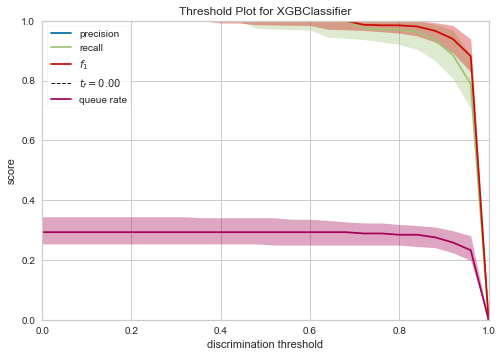

In [33]:
data_acc_car_class_prediction(pipeline.steps[1][1], pipeline[0].transform(X_train), y_train,
                         X_test,y_test,pipeline.predict(X_test), pipeline.predict_proba(X_test),
                         "coefficients",threshold_plot = True)

ЗАДАНИЕ 6.

Сделать подбор гиперпараметров с помощью той же самой cross-validation.

In [34]:
#Уже сделано
clf.best_params_

{'classifier__max_depth': 5,
 'classifier__n_estimators': 300,
 'classifier__subsample': 0.6}

ЗАДАНИЕ 7. 

Сохраните вашу модель на диск

In [35]:
import dill

with open("car_evaluation_model_trained_XGB.dill", "wb") as f:
    dill.dump(pipeline, f)